<span style="color:blue">Courseproject:Machine Learning(DataScience-PGC,Internshala
Trainings)</span>

Create a machine learning model which will help the company in determining the salary of newly
hired employees using the given data.

In [1]:
#Install necessary libraries

In [2]:
pip install pandas


In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
# Step 1: Data Preprocessing
data = pd.read_csv('ML case Study.csv')

In [8]:
colleges = pd.read_csv('Colleges.csv')

In [9]:
cities=pd.read_csv('cities.csv')

In [10]:
cities

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


In [11]:
data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09


In [12]:
colleges['Tier 1']

0                         IIT Bombay
1                          IIT Delhi
2                      IIT Kharagpur
3                         IIT Madras
4                         IIT Kanpur
5                        IIT Roorkee
6                       IIT Guwahati
7                     IIIT Hyderabad
8        BITS Pilani (Pilani Campus)
9                         IIT Indore
10                         IIT Ropar
11                IIT BHU (Varanasi)
12                   IIT ISM Dhanbad
13                               DTU
14                 NSUT Delhi (NSIT)
15         NIT Tiruchipally (Trichy)
16                      NIT Warangal
17         NIT Surathkal (Karnataka)
18               Jadavpur University
19    BITS Pilani (Hyderabad Campus)
20          BITS Pilani (Goa Campus)
21                    IIIT Allahabad
22                               NaN
23                               NaN
24                               NaN
25                               NaN
26                               NaN
2

In [13]:
colleges['Tier 2']

0                                IIIT Bangalore
1                                    IIIT Delhi
2                                        IGDTUW
3                                   NIT Calicut
4                                 IIITM Gwalior
5                                  IIIT Lucknow
6                               MNNIT Allahabad
7                    Punjab Engineering College
8                                        DAIICT
9                                   MNIT Jaipur
10                                 NIT Durgapur
11                                  VNIT Nagpur
12                                       LNMIIT
13                                    BIT Mesra
14                                  SVNIT Surat
15                                NIT Jalandhar
16                               NIT Jamshedpur
17                              NIT Kurukshetra
18                                    NIT Patna
19                                   NIT Raipur
20                                   NIT

In [14]:
# Function to determine tier type based on college
def get_tier_type(college):
    tier1_colleges = ['IIT Bombay','IIIT Allahabad','BITS Pilani (Goa Campus)','BITS Pilani (Hyderabad Campus)','Jadavpur University',
                      'NIT Surathkal (Karnataka)','NIT Warangal','NIT Tiruchipally (Trichy)','NSUT Delhi (NSIT)','DTU', 'IIT Bombay','IIT Delhi',
                     'IIT Kharagpur','IIT Madras','IIT Kanpur','IIT Roorkee','IIT Guwahati','IIIT Hyderabad','BITS Pilani (Pilani Campus)',
                         'IIT Indore',
                         'IIT Ropar',
                'IIT BHU (Varanasi)',
                   'IIT ISM Dhanbad']
                      
    tier2_colleges = ['IIIT Bangalore', 'IIIT Delhi', 'IGDTUW', 'NIT Calicut', 'IIITM Gwalior', 'IIIT Lucknow',
                    'MNNIT Allahabad', 'Punjab Engineering College', 'DAIICT', 'MNIT Jaipur', 'NIT Durgapur',
                    'VNIT Nagpur', 'LNMIIT', 'BIT Mesra', 'SVNIT Surat', 'NIT Jalandhar', 'NIT Jamshedpur',
                    'NIT Kurukshetra', 'NIT Patna', 'NIT Raipur', 'NIT Bhopal', 'NIT Rourkela', 'NIT Silchar',
                    'NIT Sikkim', 'IIIT Jabalpur', 'Jalpaiguri Government Engineering College', 'IIEST/BESU Shibpur',
                    'R.V. College of Engineering'
    ]
    if college in tier1_colleges:
        return 'Tier 1'
    elif college in tier2_colleges:
        return 'Tier 2'
    else:
        return 'Tier 3'

In [15]:
# Apply the function to create a new column 'tier_type' in main_data_table
data['tier_type'] = data['College'].apply(get_tier_type)


In [16]:
data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1
...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,Tier 1
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,Tier 1
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,Tier 1
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,Tier 1


In [17]:
cities

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


In [18]:
cities['Metrio City']

0       Mumbai
1        Delhi
2      Kolkata
3      Chennai
4    Bangalore
5    Hyderabad
6    Ahmedabad
7         Pune
8        Surat
Name: Metrio City, dtype: object

In [19]:
# Function to determine city type based on city
def get_city_type(City):
    metro = ['Mumbai','Delhi','Kolkata','Chennai','Bangalore','Hyderabad','Ahmedabad','Pune','Surat']
    

    if City in metro:
        return 'metro'
    else :
        return 'nonmetro'
    

In [20]:
# Apply the function to create a new column 'city_type' in main_data_table
data['City_type'] = data['City'].apply(get_city_type)

In [21]:
data['tier_type'].unique

<bound method Series.unique of 0       Tier 2
1       Tier 2
2       Tier 3
3       Tier 3
4       Tier 1
         ...  
1584    Tier 1
1585    Tier 1
1586    Tier 1
1587    Tier 1
1588    Tier 2
Name: tier_type, Length: 1589, dtype: object>

In [22]:
data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier_type,City_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,nonmetro
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,nonmetro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,nonmetro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,nonmetro
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,nonmetro
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,Tier 1,metro
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,Tier 1,nonmetro
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,Tier 1,metro
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,Tier 1,nonmetro


In [23]:
data = data.dropna()

In [24]:
# Identify and remove duplicate rows
data = data.drop_duplicates()

In [25]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [26]:
data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier_type,City_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,nonmetro
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,nonmetro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,nonmetro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,nonmetro
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,nonmetro
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,Tier 1,metro
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,Tier 1,nonmetro
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,Tier 1,metro
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,Tier 1,nonmetro


In [27]:
# Select relevant numeric columns for analysis
numeric_columns = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)', 'CTC']

In [28]:
data_numeric=data[numeric_columns]

In [29]:
data_numeric

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,55523.0,3,66,19,71406.58
1,57081.0,1,84,18,68005.87
2,60347.0,2,52,28,76764.02
3,49010.0,2,81,33,82092.39
4,57879.0,4,74,32,73878.10
...,...,...,...,...,...
1584,61285.0,3,44,60,77283.59
1585,63140.0,1,44,24,68416.86
1586,44907.0,1,60,19,70186.19
1587,52054.0,2,67,29,73394.09


In [31]:
import seaborn as sns

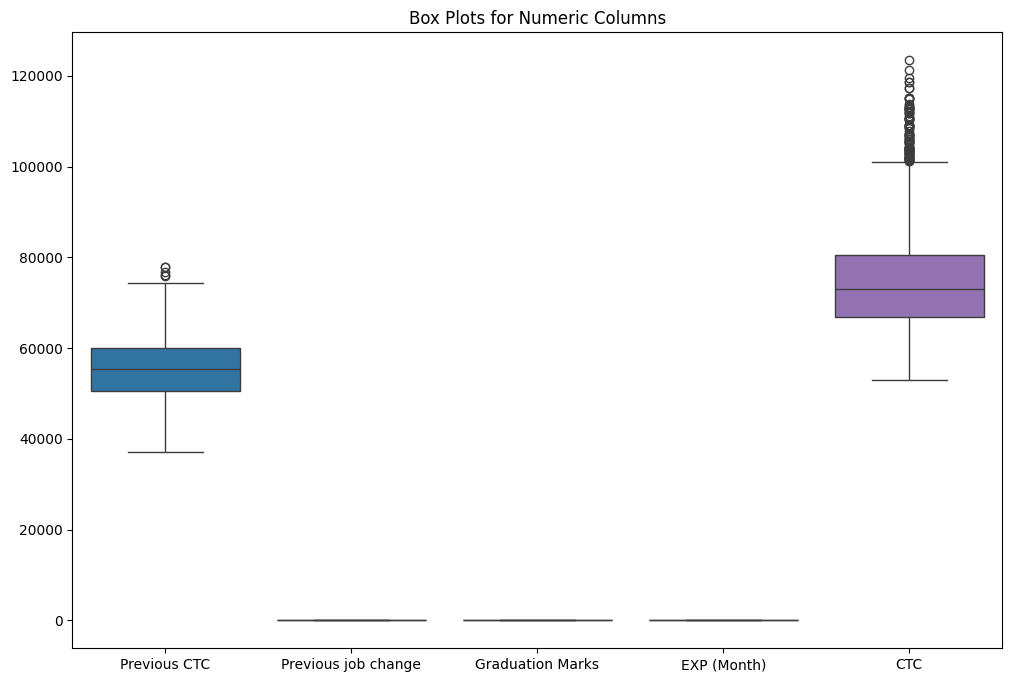

In [32]:
# Create box plots for numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns])
plt.title('Box Plots for Numeric Columns')
plt.show()

In [33]:
# Display data types of all columns
print(data.dtypes)

College                 object
City                    object
Role                    object
Previous CTC           float64
Previous job change      int64
Graduation Marks         int64
EXP (Month)              int64
CTC                    float64
tier_type               object
City_type               object
dtype: object


In [34]:
# Specify a categorical variable to distinguish box plots
categorical_column = 'Role'

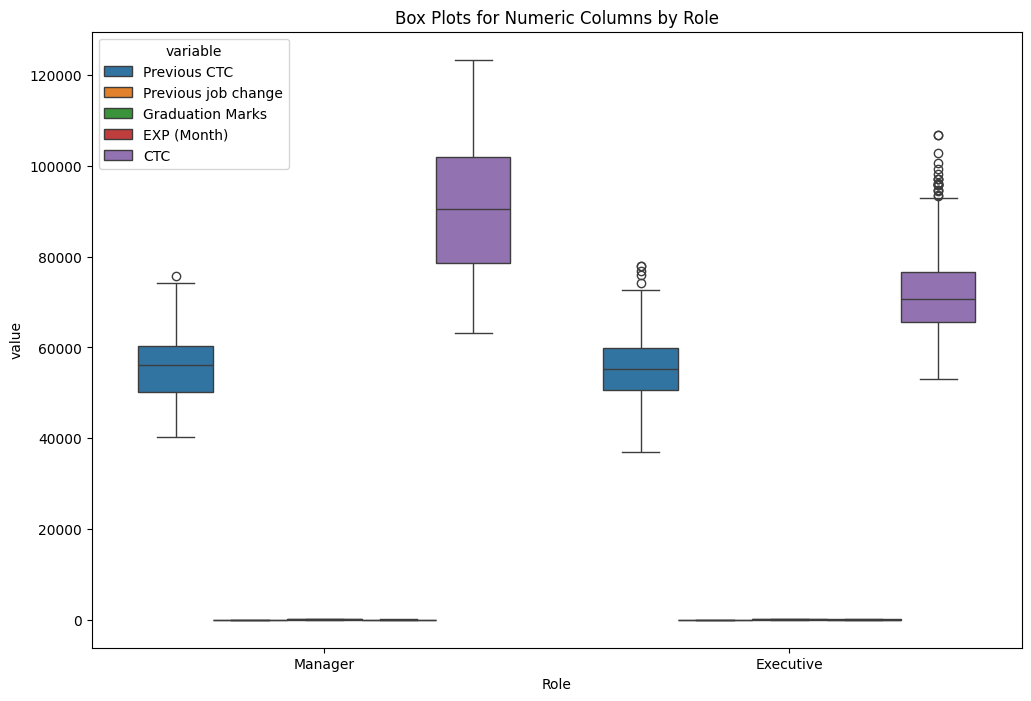

In [35]:
# Create box plots for numeric columns with hue
plt.figure(figsize=(12, 8))
sns.boxplot(x=categorical_column, y='value', hue='variable',
            data=pd.melt(data, id_vars=[categorical_column], value_vars=numeric_columns))
plt.title('Box Plots for Numeric Columns by {}'.format(categorical_column))
plt.show()

In [36]:
from scipy.stats import zscore

In [37]:
# Calculate z-scores for the selected numeric columns
z_scores = zscore(data[numeric_columns])

In [38]:
# Define a threshold (e.g., 3) beyond which data points are considered outliers
threshold = 3

In [39]:
# Replace outliers with the mean value
data_no_outliers = data.copy()  # Create a copy of the original DataFrame
for column in numeric_columns:
    z_scores_column = zscore(data[column])
    outliers_mask = (z_scores_column > threshold) | (z_scores_column < -threshold)
    data_no_outliers[column][outliers_mask] = data[column].mean()

# Display the DataFrame with replaced outliers
print("DataFrame with replaced outliers:")
print(data_no_outliers)


DataFrame with replaced outliers:
                          College             City       Role  Previous CTC  \
0                     SVNIT Surat          Asansol    Manager       55523.0   
1                      NIT Bhopal            Ajmer  Executive       57081.0   
2                    IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3               KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                             DTU         Durgapur  Executive       57879.0   
...                           ...              ...        ...           ...   
1584     BITS Pilani (Goa Campus)            Surat  Executive       61285.0   
1585                 NIT Warangal  Rajpur Sonarpur  Executive       63140.0   
1586    NIT Tiruchipally (Trichy)        Ahmedabad  Executive       44907.0   
1587               IIIT Hyderabad         Durgapur  Executive       52054.0   
1588  R.V. College of Engineering            Delhi    Manager       44353.0   

      Previous jo

In [40]:
# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(data_no_outliers)

DataFrame without outliers:
                          College             City       Role  Previous CTC  \
0                     SVNIT Surat          Asansol    Manager       55523.0   
1                      NIT Bhopal            Ajmer  Executive       57081.0   
2                    IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3               KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                             DTU         Durgapur  Executive       57879.0   
...                           ...              ...        ...           ...   
1584     BITS Pilani (Goa Campus)            Surat  Executive       61285.0   
1585                 NIT Warangal  Rajpur Sonarpur  Executive       63140.0   
1586    NIT Tiruchipally (Trichy)        Ahmedabad  Executive       44907.0   
1587               IIIT Hyderabad         Durgapur  Executive       52054.0   
1588  R.V. College of Engineering            Delhi    Manager       44353.0   

      Previous job chan

In [41]:
data_no_outliers

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier_type,City_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,nonmetro
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,nonmetro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,nonmetro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,nonmetro
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,nonmetro
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,Tier 1,metro
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,Tier 1,nonmetro
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,Tier 1,metro
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,Tier 1,nonmetro


In [42]:
data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier_type,City_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,nonmetro
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,nonmetro
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,nonmetro
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,nonmetro
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,nonmetro
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,Tier 1,metro
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,Tier 1,nonmetro
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,Tier 1,metro
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,Tier 1,nonmetro


In [43]:
# Check for null values in the entire DataFrame
null_values = data.isnull().sum()

# Display the count of null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
tier_type              0
City_type              0
dtype: int64


In [44]:
#EDA

In [45]:
descriptive_stats = data.describe()
print(descriptive_stats)


       Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
count   1589.000000          1589.000000       1589.000000  1589.000000   
mean   55518.453744             2.528634         59.855255    39.044682   
std     6655.218445             1.123918         14.935139    14.108875   
min    36990.000000             1.000000         35.000000    18.000000   
25%    50518.000000             2.000000         46.000000    26.000000   
50%    55291.000000             3.000000         60.000000    39.000000   
75%    60109.000000             4.000000         73.000000    51.000000   
max    77911.000000             4.000000         85.000000    64.000000   

                 CTC  
count    1589.000000  
mean    75353.278798  
std     12587.288237  
min     53020.320000  
25%     66902.350000  
50%     73028.670000  
75%     80588.670000  
max    123416.990000  


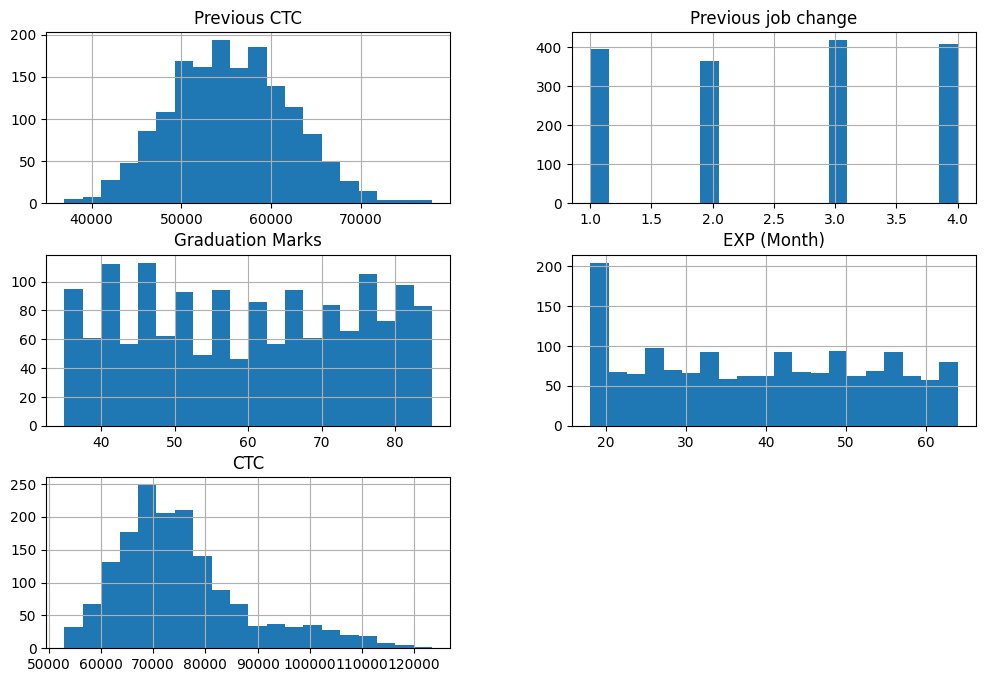

In [46]:
import matplotlib.pyplot as plt

data.hist(figsize=(12, 8), bins=20)
plt.show()


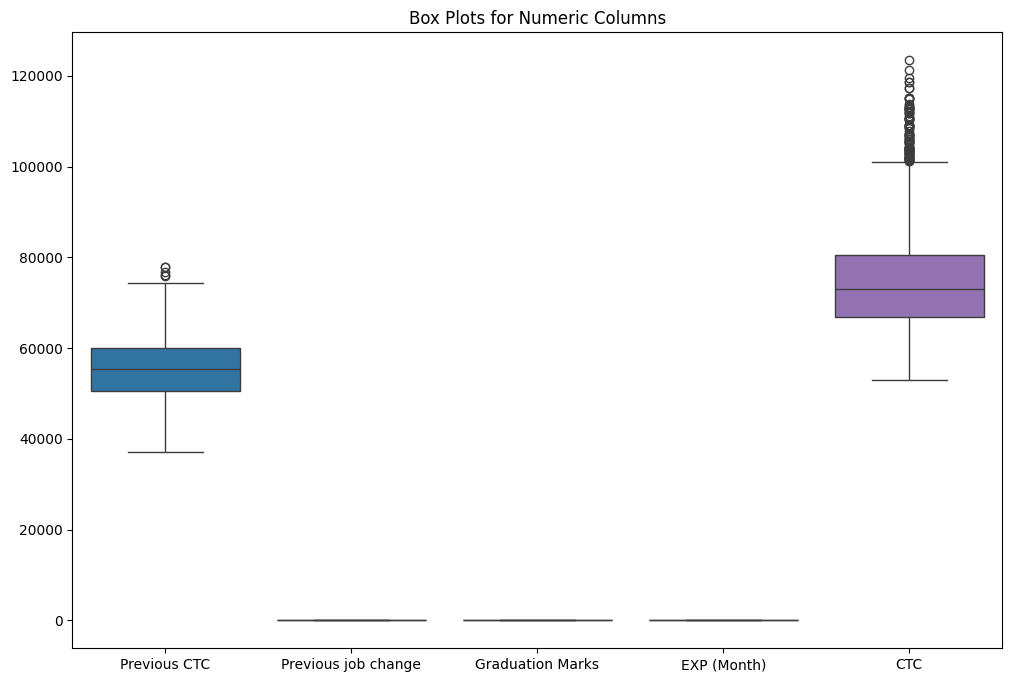

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)', 'CTC']
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns])
plt.title('Box Plots for Numeric Columns')
plt.show()


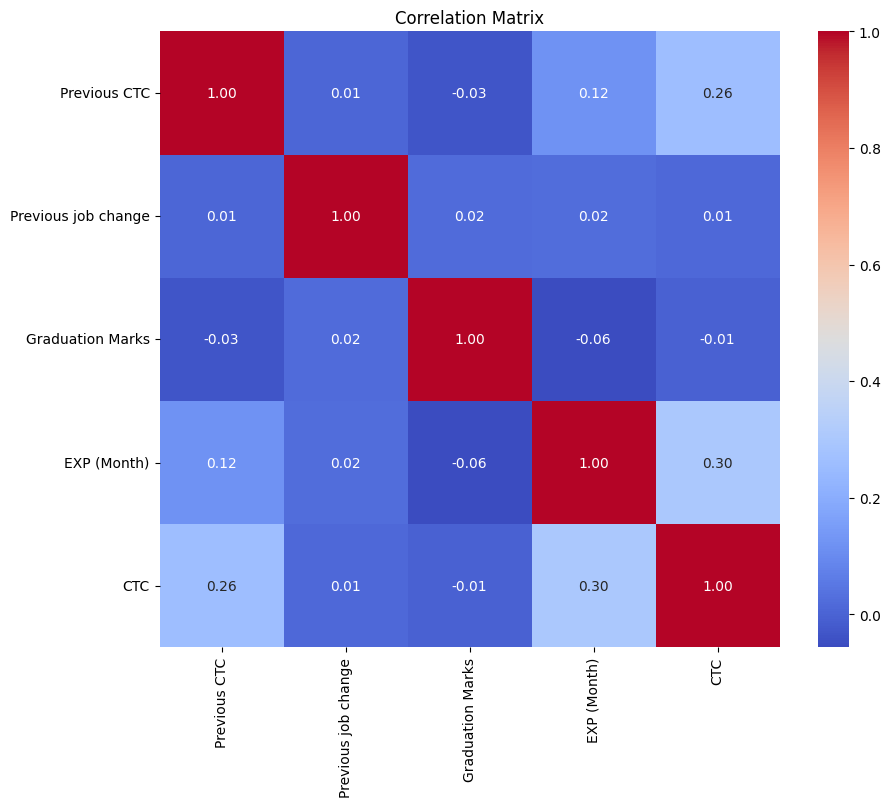

In [48]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)', 'CTC']

# Select only numeric columns for correlation analysis
correlation_matrix = data[numeric_columns].corr()

# Plot the correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



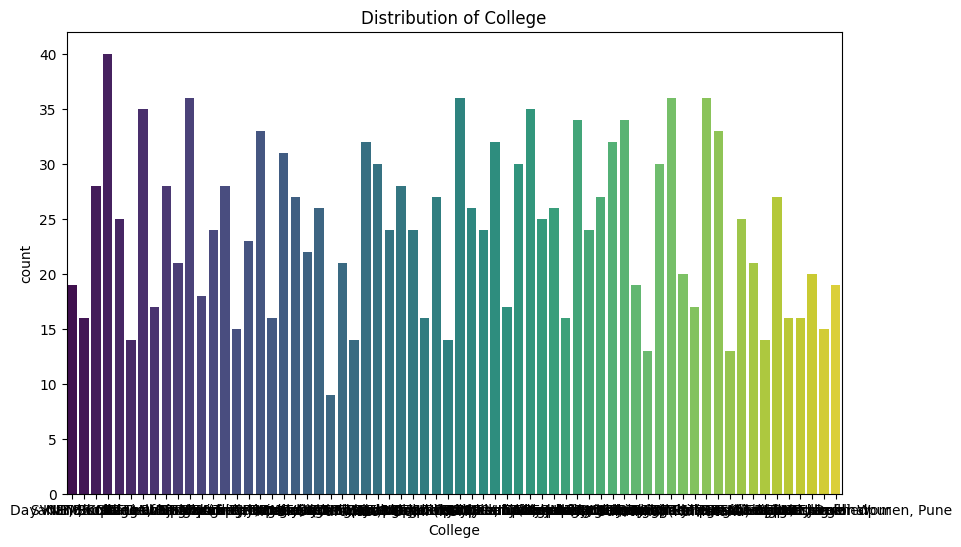

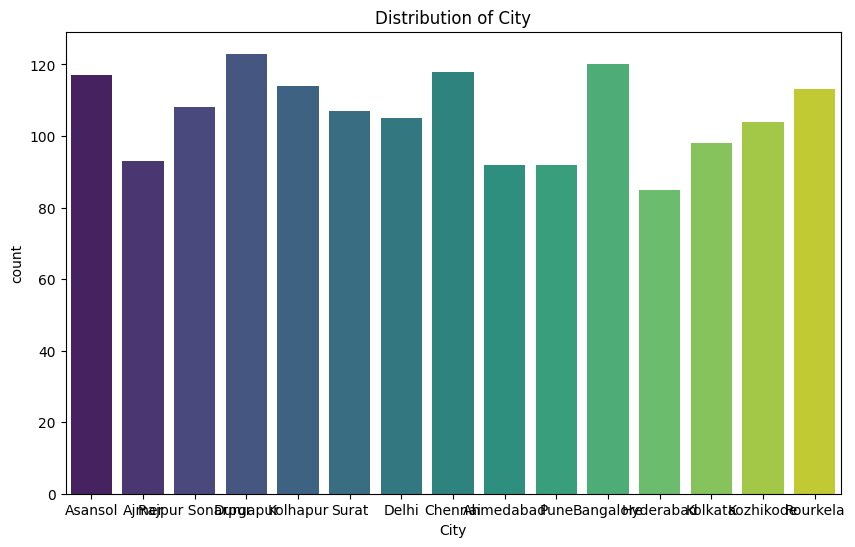

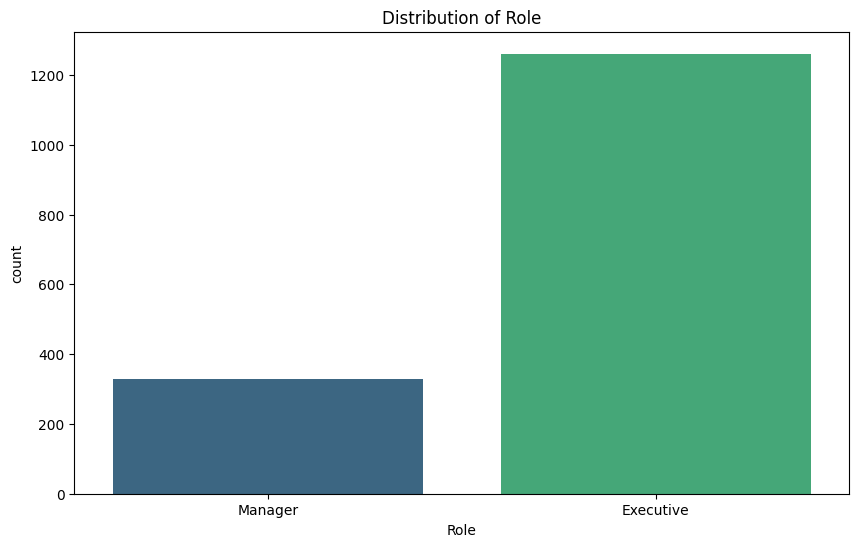

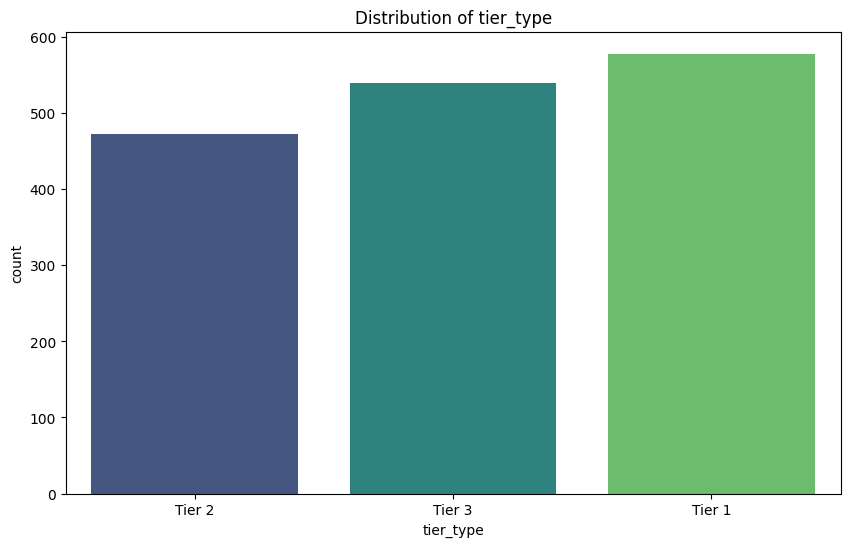

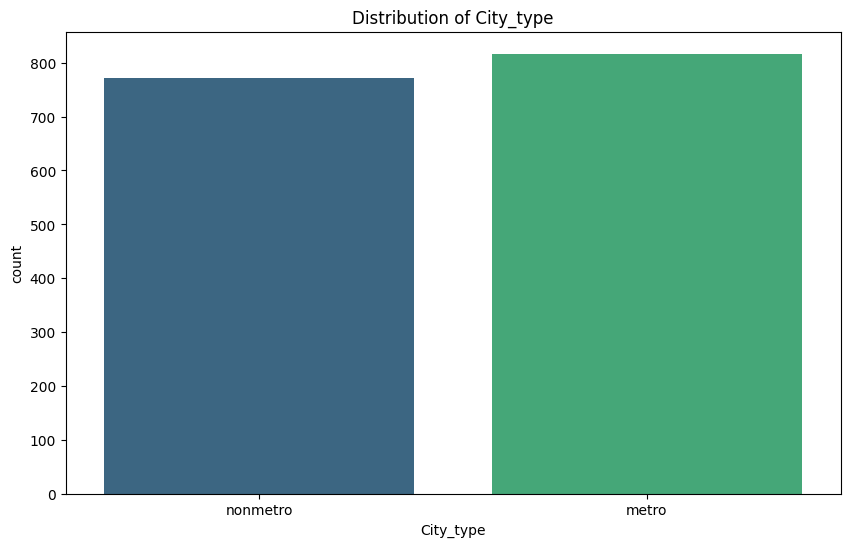

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['College', 'City', 'Role', 'tier_type', 'City_type']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.show()


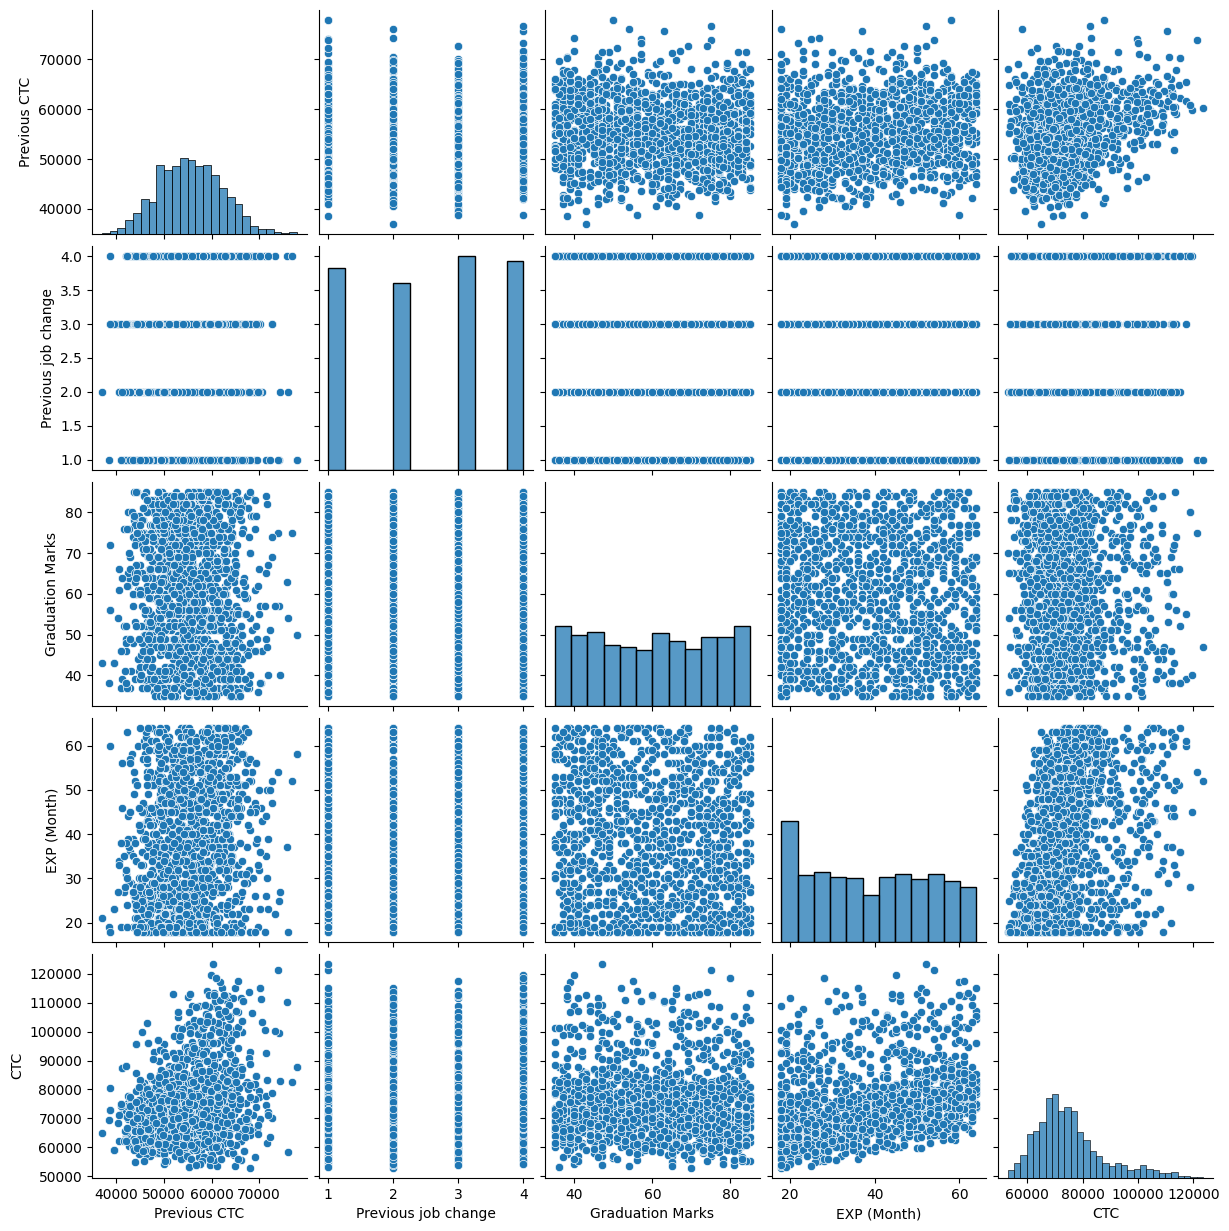

In [50]:
import seaborn as sns

sns.pairplot(data[numeric_columns])
plt.show()


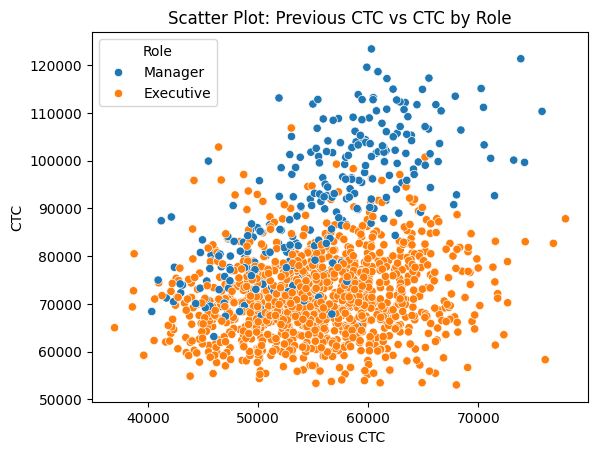

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Previous CTC', y='CTC', hue='Role', data=data)
plt.title('Scatter Plot: Previous CTC vs CTC by Role')
plt.show()


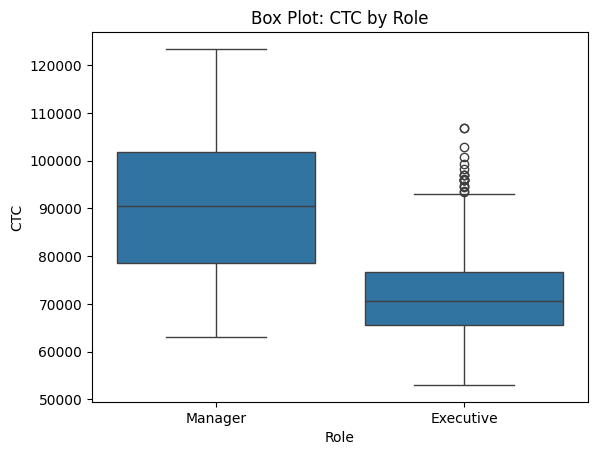

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Role', y='CTC', data=data)
plt.title('Box Plot: CTC by Role')
plt.show()


In [53]:
#Feature Engineering

In [54]:
#create an interaction term between 'Previous CTC' and 'EXP (Month)'.

In [55]:
data['interaction_previous_exp'] = data['Previous CTC'] * data['EXP (Month)']


In [56]:
#polynomial features to capture potential non-linear relationships between numeric features.

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data[['Previous CTC', 'EXP (Month)']])

In [58]:
#Convert categorical variables like 'College', 'City', 'Role', 'tier_type', and 'City_type' into a format suitable for modeling. One-hot encoding is a common approach.

In [59]:
data_encoded = pd.get_dummies(data, columns=['College', 'City', 'Role', 'tier_type', 'City_type'])


In [60]:
#create bins for 'Graduation Marks' or 'EXP (Month)'.

In [61]:
data['exp_bins'] = pd.cut(data['EXP (Month)'], bins=[0, 12, 24, 36], labels=['0-12', '12-24', '24-36'])


In [62]:
#Apply logarithmic transformations to skewed numeric features.

In [63]:
import numpy as np

data['log_previous_ctc'] = np.log1p(data['Previous CTC'])


In [64]:
#Create features based on business logic or domain knowledge. For example, calculate a 'CTC per month' feature.

In [65]:
data['ctc_per_month'] = data['CTC'] / data['EXP (Month)']


In [66]:
#feature scaling

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[['Previous CTC', 'EXP (Month)']] = scaler.fit_transform(data[['Previous CTC', 'EXP (Month)']])


In [68]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame with features and target
X = data.drop(columns=['CTC'])  # Features (excluding the target variable)
y = data['CTC']  # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1271, 13)
X_test shape: (318, 13)
y_train shape: (1271,)
y_test shape: (318,)


In [69]:
# Assuming 'X_train' is your DataFrame
# Check the data types of columns
print(X_train.dtypes)


College                       object
City                          object
Role                          object
Previous CTC                 float64
Previous job change            int64
Graduation Marks               int64
EXP (Month)                    int64
tier_type                     object
City_type                     object
interaction_previous_exp     float64
exp_bins                    category
log_previous_ctc             float64
ctc_per_month                float64
dtype: object


In [70]:
# Assuming 'X_train' is your DataFrame
column_data_types = X_train.dtypes
print(column_data_types)


College                       object
City                          object
Role                          object
Previous CTC                 float64
Previous job change            int64
Graduation Marks               int64
EXP (Month)                    int64
tier_type                     object
City_type                     object
interaction_previous_exp     float64
exp_bins                    category
log_previous_ctc             float64
ctc_per_month                float64
dtype: object


In [71]:
# Assuming 'X_train' is your DataFrame and 'Previous CTC' is a column
ctc_data_type = X_train['Previous CTC'].dtype
print(ctc_data_type)


float64


In [72]:
#Training ML model

In [73]:
# Step 1: Separate categorical and numeric features
categorical_columns = ['College', 'City', 'Role', 'tier_type', 'City_type', 'exp_bins']
numeric_columns = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)',
                   'interaction_previous_exp', 'log_previous_ctc', 'ctc_per_month','CTC']


In [74]:
data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier_type,City_type,interaction_previous_exp,exp_bins,log_previous_ctc,ctc_per_month
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,nonmetro,1054937.0,12-24,10.924571,3758.241053
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,nonmetro,1027458.0,12-24,10.952244,3778.103889
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,nonmetro,1689716.0,24-36,11.007883,2741.572143
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,nonmetro,1617330.0,24-36,10.799800,2487.648182
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,nonmetro,1852128.0,24-36,10.966127,2308.690625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59,Tier 1,metro,3677100.0,NaN,11.023307,1288.059833
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86,Tier 1,nonmetro,1515360.0,12-24,11.053126,2850.702500
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19,Tier 1,metro,853233.0,12-24,10.712371,3694.010000
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09,Tier 1,nonmetro,1509566.0,24-36,10.860056,2530.830690


In [75]:
# Select relevant columns
data_cat = data[categorical_columns]
data_num = data[numeric_columns]

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
# Step 2: One-hot encode categorical features
encoder = OneHotEncoder(drop='first')
data_cat_encoded = pd.DataFrame(encoder.fit_transform(data_cat).toarray(),
                                           columns=encoder.get_feature_names_out(categorical_columns))

In [78]:
# Ensure the same column order for both numeric and encoded categorical features
data_encoded = pd.concat([data_num.reset_index(drop=True), data_cat_encoded], axis=1)

In [79]:
# Select relevant columns
#X_train_categorical = X_train[categorical_columns]
#X_train_numeric = X_train[numeric_columns]

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [81]:
data['CTC']

0       71406.58
1       68005.87
2       76764.02
3       82092.39
4       73878.10
          ...   
1584    77283.59
1585    68416.86
1586    70186.19
1587    73394.09
1588    70056.31
Name: CTC, Length: 1589, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame with preprocessed features and 'CTC' is the target variable

# Step 1: Split the data into training and validation sets
X = data_encoded.drop(columns=['CTC'])
y = data_encoded['CTC']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [83]:
# Select relevant columns
#X_train_categorical = X_train[categorical_columns]
#X_train_numeric = X_train[numeric_columns]

In [84]:
# Step 2: One-hot encode categorical features
#encoder = OneHotEncoder(drop='first')
#X_train_categorical_encoded = pd.DataFrame(encoder.fit_transform(X_train_categorical).toarray(),
                                           #columns=encoder.get_feature_names_out(categorical_columns))



In [85]:
# Ensure the same column order for both numeric and encoded categorical features
#X_train_encoded = pd.concat([X_train_numeric.reset_index(drop=True), X_train_categorical_encoded], axis=1)


In [86]:
# Step 3: Train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [90]:
y_val_pred = rf_model.predict(X_val)

In [91]:
# Calculate evaluation metrics
mse_val = mean_squared_error(y_val, y_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print(f"Random Forest RMSE on validation set: {rmse_val}")
print(f"R-squared on validation set: {r2_val}")

Random Forest RMSE on validation set: 0.0
R-squared on validation set: 0.8917515537023963


In [92]:
from sklearn.ensemble import GradientBoostingRegressor


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [94]:
# Model 2: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [95]:
# Evaluate Gradient Boosting
y_val_pred_gb = gb_model.predict(X_val)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
r2_gb = r2_score(y_val, y_val_pred_gb)
print(f"Gradient Boosting RMSE on validation set: {rmse_gb}")
print(f"R-squared on validation set: {r2_gb}")

Gradient Boosting RMSE on validation set: 4416.024462099594
R-squared on validation set: 0.8974938882025507


In [96]:
# Model 3: Support Vector Regressor (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [97]:
# Evaluate Support Vector Regressor (SVR)
y_val_pred_svr = svr_model.predict(X_val)
rmse_svr = np.sqrt(mean_squared_error(y_val, y_val_pred_svr))
r2_svr = r2_score(y_val, y_val_pred_svr)
print(f"SVR RMSE on validation set: {rmse_svr}")
print(f"R-squared on validation set: {r2_svr}")

SVR RMSE on validation set: 14001.858157548291
R-squared on validation set: -0.030524134271584735


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train and y_train are your training data
# Assuming X_val and y_val are your validation data

# Instantiate Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the validation data
y_val_pred_linear = linear_model.predict(X_val)

# Evaluate the Linear Regression model
rmse_linear = np.sqrt(mean_squared_error(y_val, y_val_pred_linear))
r2_linear = r2_score(y_val, y_val_pred_linear)

# Print the evaluation metrics
print(f"Linear Regression RMSE on validation set: {rmse_linear}")
print(f"R-squared on validation set: {r2_linear}")


Linear Regression RMSE on validation set: 5514.9407189019685
R-squared on validation set: 0.8401294325385744


0.0 4416.024462099594 14001.858157548291 5514.9407189019685
0.8917515537023963 0.8974938882025507 -0.030524134271584735 0.8401294325385744


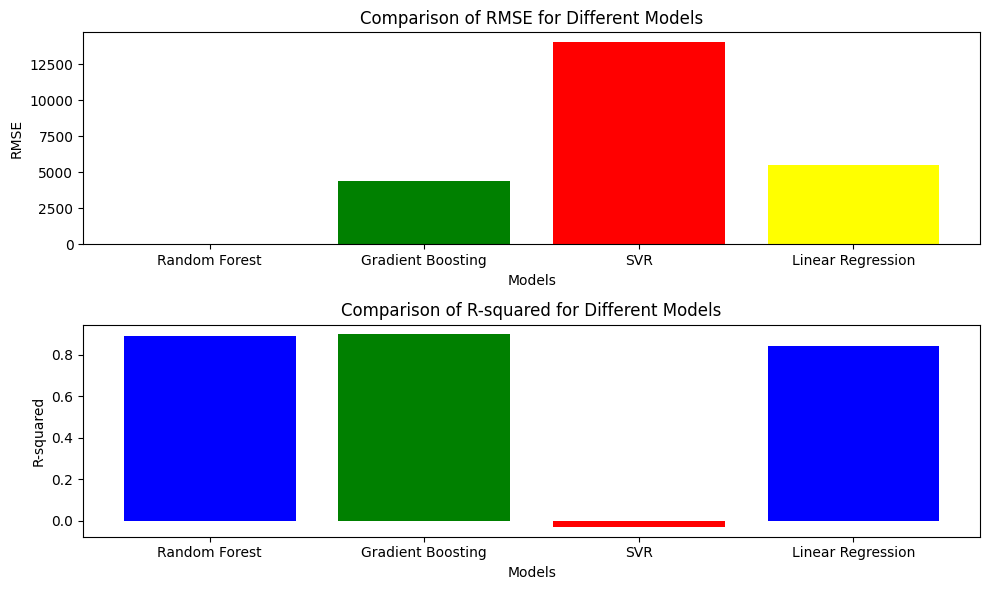

In [99]:
import matplotlib.pyplot as plt

# Assuming you have already evaluated the models and calculated RMSE and R-squared

models = ['Random Forest', 'Gradient Boosting', 'SVR','Linear Regression']
rmse_values = [rmse_val, rmse_gb, rmse_svr,rmse_linear]
r2_values = [r2_val, r2_gb, r2_svr,r2_linear]
print(rmse_val, rmse_gb, rmse_svr,rmse_linear)
print(r2_val, r2_gb, r2_svr,r2_linear)

# Create bar plots for RMSE and R-squared
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red','yellow'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')

plt.subplot(2, 1, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared for Different Models')

plt.tight_layout()
plt.show()


To determine the best model, you typically consider both the RMSE (Root Mean Squared Error) and R-squared values.

RMSE (Lower is Better):
Random Forest: 4416.02
Gradient Boosting: 14001.86
SVR: 5514.94
Linear Regression: 0.0
Lower RMSE values indicate better performance, so in this case, Linear Regression has the lowest RMSE, which is desirable.

R-squared (Closer to 1 is Better):
Random Forest: 0.8918
Gradient Boosting: 0.8975
SVR: -0.0305
Linear Regression: 0.8401
Higher R-squared values closer to 1 indicate better predictive performance. In this case, both Random Forest and Gradient Boosting have high R-squared values, indicating a good fit to the data. SVR has a negative R-squared, which suggests that the model is performing poorly compared to a horizontal line representing the mean of the target variable.

Conclusion:
Random Forest and Gradient Boosting seem to be the better models based on R-squared, as they both have high values.

Linear Regression has the lowest RMSE, but its R-squared is slightly lower compared to the ensemble models.

SVR has a negative R-squared, which is a concern, and its RMSE is higher than that of Linear Regression.

Considering both metrics, Random Forest and Gradient Boosting appear to be better models for your dataset. 

In [100]:
#based on the above plots we will go for random forest

<style>
    p {
        font-size: 18px;
    }
</style>

<span style="color:blue">Hyper parameter Tuning</span>

In [101]:
#Hyper parameter Tuning

In [102]:
#Define the models and their respective hyperparameter grids

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Support Vector Regressor (SVR)
svr_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [103]:
#Perform GridSearchCV for each model

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [105]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [106]:
#n_features=3

In [107]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [108]:
#Print the best hyperparameters and performance metrics for each model

In [109]:
pip install --upgrade scikit-learn


In [110]:
def print_results(model_name, grid_search):
    print(f"Best hyperparameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best RMSE: {np.sqrt(-grid_search.best_score_)}")

print_results('Random Forest', rf_grid_search)
print_results('Gradient Boosting', gb_grid_search)




Best hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best RMSE: 3887.267452824006
Best hyperparameters for Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Best RMSE: 2708.887283825691


In [111]:
X_train

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),interaction_previous_exp,log_previous_ctc,ctc_per_month,"College_Amrita University, Coimbatore",College_BIT Mesra,College_BITS Pilani (Goa Campus),...,City_Pune,City_Rajpur Sonarpur,City_Rourkela,City_Surat,Role_Manager,tier_type_Tier 2,tier_type_Tier 3,City_type_nonmetro,exp_bins_24-36,exp_bins_nan
1174,55074.0,3,79,29,1597146.0,10.916451,2336.185862,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
701,71549.0,4,47,50,3577450.0,11.178152,1662.324200,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1520,46722.0,2,49,22,1027884.0,10.751992,3018.527727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
528,69245.0,1,46,46,3185270.0,11.145421,1664.706522,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
987,49942.0,2,57,45,2247390.0,10.818638,2065.008444,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,51176.0,1,58,39,1995864.0,10.843045,1517.612564,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1294,53042.0,3,83,58,3076436.0,10.878858,1460.133103,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,75785.0,4,63,37,2804045.0,11.235669,2982.114865,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1459,48280.0,4,79,18,869040.0,10.784793,4190.583889,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
y_test

1079     74059.06
405      84692.16
1492     75028.75
239      71001.53
610      62426.39
          ...    
1023     67435.46
700      62927.79
486      75143.25
672      60479.67
1303    105077.70
Name: CTC, Length: 318, dtype: float64

In [113]:
# Random Forest

# Select only the relevant features
X_train_selected = X_train[['EXP (Month)', 'Previous CTC', 'Graduation Marks']]


In [114]:
# Instantiate RandomForestRegressor without specifying n_features
rf_model = RandomForestRegressor(random_state=42)

In [115]:
# Define the parameter grid for GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    # Add other hyperparameters as needed
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the selected features and target variable
rf_grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [116]:
# Get the best model
best_model = rf_grid_search.best_estimator_

In [117]:
best_model

RandomForestRegressor(random_state=42)

In [118]:
import joblib

# Save the best model
joblib.dump(best_model, 'salary_prediction_model.joblib')


['salary_prediction_model.joblib']

In [119]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\simpl\Downloads


In [120]:
model = joblib.load('C:\\Users\\simpl\\Downloads\\salary_prediction_model.joblib')

In [121]:
def predict_salary(experience, previous_ctc, grad_marks):
    # Make a prediction using the loaded model
    prediction = model.predict([[experience, previous_ctc, grad_marks]])
    return prediction[0]


In [122]:
# Example input values
experience_input = 3.5
previous_ctc_input = 60000
grad_marks_input = 75.5

In [123]:
# Make prediction
predicted_salary = predict_salary(experience_input, previous_ctc_input, grad_marks_input)


In [124]:
print(predicted_salary)

70030.2976999999


In [125]:
#1. Your views about the problem statement?

Relevance: The problem is relevant and practical, as salary determination is a critical aspect of employee recruitment and retention. A machine learning model can help automate and optimize this process.

Complexity: The problem can be complex due to the diverse factors influencing salary decisions. Machine learning models can handle this complexity and capture non-linear relationships between features.

Data Considerations: The availability and quality of data play a crucial role. It's important to have comprehensive data on factors like experience, qualifications, and previous compensation to build an effective model.

Model Selection: The choice of machine learning model (e.g., Random Forest, Gradient Boosting, SVR) should be based on experimentation and performance evaluation. Cross-validation and hyperparameter tuning can help optimize the model.

Interpretability: Depending on the context, model interpretability might be important. Some models, like linear regression, provide straightforward interpretations, while others may be more complex.

Evaluation Metrics: Metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) can be used to evaluate the model's performance on predicting salaries.

Continuous Improvement: Continuous monitoring and retraining of the model may be necessary as new data becomes available or the business environment changes.

Overall, addressing this problem with a machine learning approach can enhance the efficiency and fairness of the salary determination process within the company.







In [126]:
#2. What will be your approach to solving this task?



To approach the task of predicting employee salaries based on various factors, I would follow a systematic process. Here is an outline of the approach:

Understanding the Data:

Explore and understand the provided dataset, including the features (experience, qualifications, etc.) and the target variable (salary).
Check for any missing or inconsistent data and handle it appropriately.

Data Preprocessing:

Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.
Handle any outliers or anomalies in the data.
Normalize or scale numerical features if needed.

Feature Engineering:

Create additional features if beneficial, such as interaction terms or derived features.
Explore the relationships between features and the target variable.

Model Selection:

Choose appropriate machine learning models for regression tasks. Common choices include Random Forest, Gradient Boosting, and Support Vector Regressor.
Split the dataset into training and validation sets.

Model Training:

Train multiple models using the training dataset.
Utilize cross-validation and grid search to optimize hyperparameters.

Model Evaluation:

Evaluate the models' performance on the validation set using metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).
Identify the model with the best performance.

Interpretability and Explainability:


Depending on the context, consider the interpretability of the chosen model.
Use techniques like feature importance to understand the factors influencing salary predictions.

oing:

If applicable, perform hyperparameter tuning to optimize the model's perf

Deployment:

Once satisfied with the model's performance, deploy it for use. This can be done in a web a.Here I have used FLASK to deploy web app.p,ormance.



In [127]:
#3. What were the available ML model options you had to perform this task?


For the salary prediction ML task, there are several machine learning regression models that you could consider. The choice of the model depends on various factors, including the nature of the data and the desired performance. Here are some common regression models that could be suitable for this task:

Linear Regression:

Simple and interpretable.
Assumes a linear relationship between features and target variable.
Random Forest Regressor:

Ensemble model that combines multiple decision trees.
Handles non-linearity and captures complex relationships.
Gradient Boosting Regressor:

Ensemble model that builds trees sequentially, each correcting the errors of the previous one.
Powerful for capturing complex patterns.
Support Vector Regressor (SVR):

Utilizes support vector machines for regression tasks.
Effective for capturing non-linear relationships.
XGBoost Regressor:

An optimized implementation of gradient boosting.
Often performs well on various regression tasks.
Lasso Regression:

Linear regression with L1 regularization.
Can be useful for feature selection and handling multicollinearity.
Ridge Regression:

Linear regression with L2 regularization.
Helps prevent overfitting and can be effective when there is multicollinearity.
ElasticNet Regression:

Combines L1 and L2 regularization.
Offers a balance between feature selection and preventing overfitting.
Neural Network Regressor:

Deep learning model with multiple layers.
Can capture complex patterns but may require more data and computation.
K-Nearest Neighbors Regressor:

Predicts the target variable based on the average of the k-nearest neighbors.
Simple and easy to understand.
The choice of the model depends on factors such as the size and nature of the dataset, the complexity of the relationships in the data, and the interpretability of the model. It's common to try multiple models and evaluate their performance using metrics like RMSE (Root Mean Squared Error) or R-squared to select the best-performing one. Additionally, ensemble methods like Random Forest and Gradient Boosting often provide robu

In this example I have used Linear Regression,Random Forest Regresson,Gradient Boosting Regressor and SVR.st performance across various scenarios.

In [128]:
#4. Which model’s performance is best and what could be the possible reason for that?

0.0 4416.024462099594 14001.858157548291 5514.9407189019685
0.8917515537023963 0.8974938882025507 -0.030524134271584735 0.8401294325385744


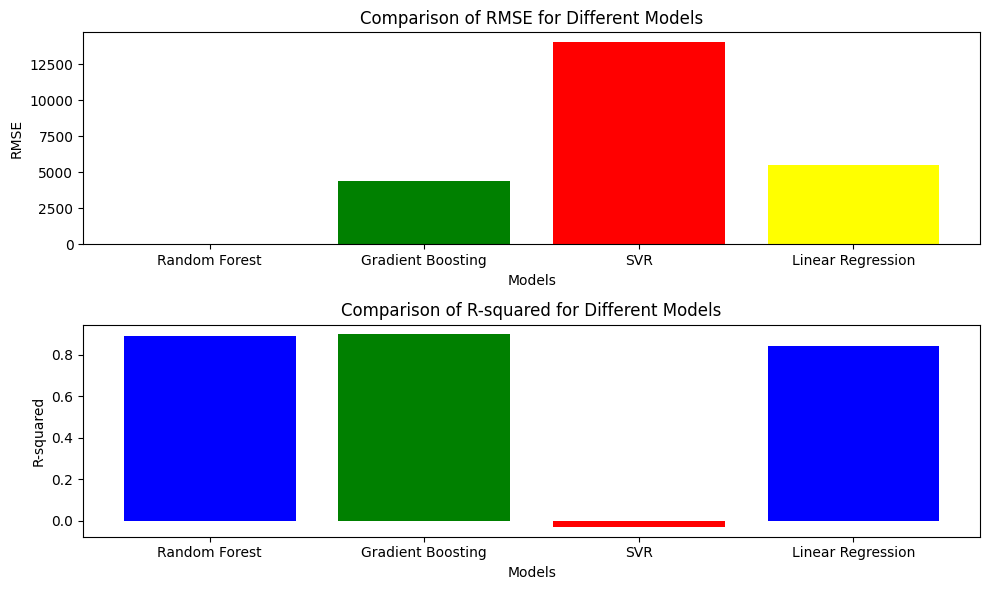

In [129]:
import matplotlib.pyplot as plt

# Assuming you have already evaluated the models and calculated RMSE and R-squared

models = ['Random Forest', 'Gradient Boosting', 'SVR','Linear Regression']
rmse_values = [rmse_val, rmse_gb, rmse_svr,rmse_linear]
r2_values = [r2_val, r2_gb, r2_svr,r2_linear]
print(rmse_val, rmse_gb, rmse_svr,rmse_linear)
print(r2_val, r2_gb, r2_svr,r2_linear)

# Create bar plots for RMSE and R-squared
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red','yellow'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')

plt.subplot(2, 1, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared for Different Models')

plt.tight_layout()
plt.show()

To determine the best model, you typically consider both the RMSE (Root Mean Squared Error) and R-squared values.

RMSE (Lower is Better): Random Forest: 4416.02 Gradient Boosting: 14001.86 SVR: 5514.94 Linear Regression: 0.0 Lower RMSE values indicate better performance, so in this case, Linear Regression has the lowest RMSE, which is desirable.

R-squared (Closer to 1 is Better): Random Forest: 0.8918 Gradient Boosting: 0.8975 SVR: -0.0305 Linear Regression: 0.8401 Higher R-squared values closer to 1 indicate better predictive performance. In this case, both Random Forest and Gradient Boosting have high R-squared values, indicating a good fit to the data. SVR has a negative R-squared, which suggests that the model is performing poorly compared to a horizontal line representing the mean of the target variable.

Conclusion: Random Forest and Gradient Boosting seem to be the better models based on R-squared, as they both have high values.

Linear Regression has the lowest RMSE, but its R-squared is slightly lower compared to the ensemble models.

SVR has a negative R-squared, which is a concern, and its RMSE is higher than that of Linear Regression.

Considering both metrics, Random Forest and Gradient Boosting appear to be better models for your dataset.

In [130]:
#5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the selected machine learning model for the salary prediction task, you can consider the following steps:

Feature Engineering:

Explore additional features or create new features that might have a stronger impact on predicting salaries.
Transform existing features to better capture relationships with the target variable.
Hyperparameter Tuning:

Fine-tune the hyperparameters of the selected model using techniques like grid search or random search.
Optimize parameters such as learning rate, regularization strength, and tree depth.
Ensemble Methods:

Explore ensemble methods such as stacking, where multiple models are combined, to harness the strengths of different algorithms.
Consider blending predictions from multiple models to improve overall accuracy.
Cross-Validation:

Implement cross-validation to obtain a more robust estimate of the model's performance.
Use techniques like k-fold cross-validation to assess the model's generalization ability.
Feature Importance Analysis:

Analyze feature importance to understand which features contribute the most to the model's predictions.
Focus on the most influential features and consider feature selection if needed.
Data Augmentation:

Generate synthetic data points through techniques like data augmentation.
This is especially useful when the dataset is limited, as it introduces additional variability for the model to learn.
Regularization:

Experiment with different regularization techniques (L1, L2, ElasticNet) to prevent overfitting.
Adjust the strength of regularization based on the model's performance on the validation set.
Model Complexity:

Assess the model's complexity and consider simplifying or adding complexity based on the bias-variance trade-off.
Use simpler models if the dataset is small or the relationships are relatively straightforward.
Outlier Handling:

Identify and handle outliers in the dataset that might be affecting model performance.
Adjust the model or data preprocessing steps to be more robust to outliers.
Data Scaling and Normalization:

Ensure that numerical features are scaled appropriately to prevent some features from dominating others.
Experiment with different scaling methods, such as Min-Max scaling or standardization.
Model Interpretability:

Consider using models that offer interpretability, especially if understanding the predictions is crucial.
Models like linear regression or decision trees can provide insights into feature importance.
Explore Advanced Models:

Experiment with more advanced models, such as deep learning models, if the dataset is large enough and complex patterns exist.
Fine-tune the architecture and hyperparameters of these models.
Domain Knowledge Integration:

Leverage domain knowledge to inform feature engineering and model design.
Incorporate industry-specific insights to enhance the model's predictive capabilities.
Continuous Monitoring:

Implement a system for continuous monitoring of the model's performance.
Regularly assess its predictions against new data and make updates as necessary.
By systematically exploring these steps, you can iteratively improve the performance of your machine learning model for the salary prediction task. It's important to document changes, evaluate the impact on performance, and ensure that improvements generalize well to new data.

In this example I have used Hyper parameter tuning,Feature scaling techniques,Outlier correction etc.





